# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

# inspect data and display the first few rows
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set that I have chosen is the Book Review data set.
2. I will be performing sentiment analysis, predicting whether the book review is positive or negative. The label is the 'positive review' column, which contains boolean values.
3. This is a supervised learning problem. It is a binary classification problem because we are predicting either a positive or negative review.
4. The main feature for my problem will be the 'review' column, which contains the text of the book reviews and the text will predict if the review is positive or not.
5. This is an important problem because this can help companies understand how readers feel about their books based on their feedback through the reviews. This can also build a book recommendation system that highlights positive reviews.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

When printing out the first few rows, I see that col['Review'] has a string value and col['Positive Review'] is a boolean. We can confirm by checking the data types.

In [3]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [4]:
# check for missing values
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

There are no missing values, so there is no need to drop any columns.

### Preprocess the text
We want to covert the text to lowercase and remove any punctuation to make the text easier to interpret.

In [5]:
import string
def preprocess_text(text):
    text = text.lower() 
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
df['preprocessed_review'] = df['Review'].apply(preprocess_text)

In [6]:
# print first rows to see preprocessed text
df[['Review', 'preprocessed_review']].head()

,Review,preprocessed_review
0,This was perhaps the best of Johannes Steinhof...,this was perhaps the best of johannes steinhof...
1,This very fascinating book is a story written ...,this very fascinating book is a story written ...
2,The four tales in this collection are beautifu...,the four tales in this collection are beautifu...
3,The book contained more profanity than I expec...,the book contained more profanity than i expec...
4,We have now entered a second time of deep conc...,we have now entered a second time of deep conc...


### Why check for class imbalance?
By checking the class imbalance, we can observe that our dataset is fairly balanced. This will ensure the model will be capableto predict both classes effectively without a need to handle any imbalance.

In [7]:
# check class imbalance
df['Positive Review'].value_counts()

False    993
True     980
Name: Positive Review, dtype: int64

### Feature Engineering
Here, I am using TfidfVectorizer to convert the texts from our 'Review' column into vectors.

#### Remove stop words that might not hold any significant meaning to the text.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(df['preprocessed_review'])
print(f"Shape of TF-IDF matrix: {X_vectorized.shape}")

Shape of TF-IDF matrix: (1973, 23385)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. My new feature list is the preprocessed review text. It has been preprocessed and is ready for training. The original raw text has been removed from the features because it was not cleaned. The class label is our target variable.
2. To prepare my data, I have converted the text to lowercase and removed punctuation as done in Part 3. I vectorized my text using TfidfVectorizer and removed common words that might not be significant during our training process. I also checked if there was any class imbalance handling necessary and observed that the dataset is quite balanced.
3. I plan to use Logistic Regression, support vector machine, and random forest.
4. My plan for training my model is to use GridSearch to find the best parameters. I will evaluate the accuracy, precision, recall, and confusion matrix.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# import packages needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:
# split features and labels
X = X_vectorized
y = df['Positive Review']

In [11]:
# split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [12]:
# defining models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

### Models of Choice:
#### 1. Logisitic Regression
This model is useful for binary classification problems such as this one. It will aid in the prediction of the probability that a review is positive or negative.
#### 2. Support Vector Machine
This model uses supervised learning to solve classification problems, which is useful for this dataset. It can capture the relationships between our features and classify with better accuracy.
#### 3. Random Forest
This model improves the accuracy and efficiency in sentiment analysis. It uses the results from multiple trees to extract meaningful texts from the dataset and be able to classify them.

In [13]:
# hyperparameters for GridSearch
param_grids = {
    'Logistic Regression': {'C': [0.1, 1]},
    'Support Vector Machine': {'C': [0.1, 1], 'kernel': ['linear']},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [None, 10]}
}

### Confusion Matrix:
By printing out a confusion matrix, it helps use visualize and measure the performance of the classification process. It shows the counts of true positives/negatives and false positives/negatives.

#### Metrics:
1. Precision: how many positive/negative predictions are actually positive/negative
2. Recall: how many actual positives/negatives are correctly identified
3. F1-score: balance between precision and recall

### Grid Search:
Each model is trained independently. GridSearchCV finds the best hyperparameters for each model and the performance metrics show which model performs the best for sentiment analysis.

### Best model:
The best model variable then determines which model is the best and then used for making predictions about the book reviews.

Training Logistic Regression...

Logistic Regression Performance:
Best Parameters: {'C': 1}
Accuracy: 0.8126582278481013
Loss: 0.5470492750458936
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.80      0.81       196
        True       0.80      0.83      0.82       199

    accuracy                           0.81       395
   macro avg       0.81      0.81      0.81       395
weighted avg       0.81      0.81      0.81       395

Confusion Matrix:
 [[156  40]
 [ 34 165]]


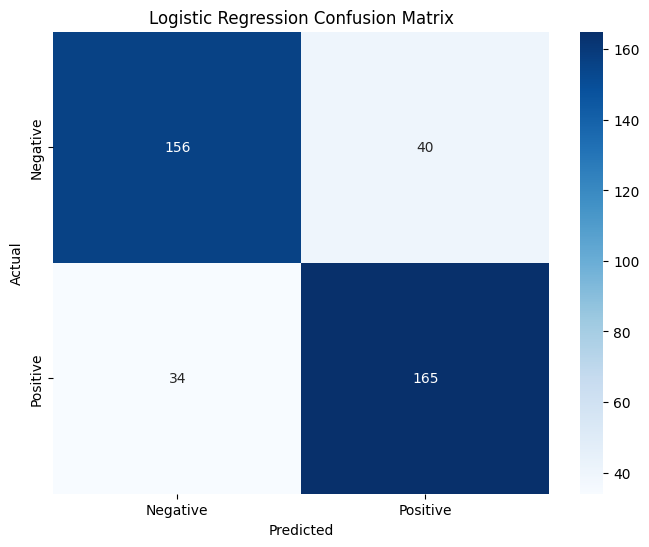

Training Support Vector Machine...

Support Vector Machine Performance:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.8202531645569621
Loss: 0.3839229691493813
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.77      0.81       196
        True       0.79      0.87      0.83       199

    accuracy                           0.82       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.82      0.82      0.82       395

Confusion Matrix:
 [[150  46]
 [ 25 174]]


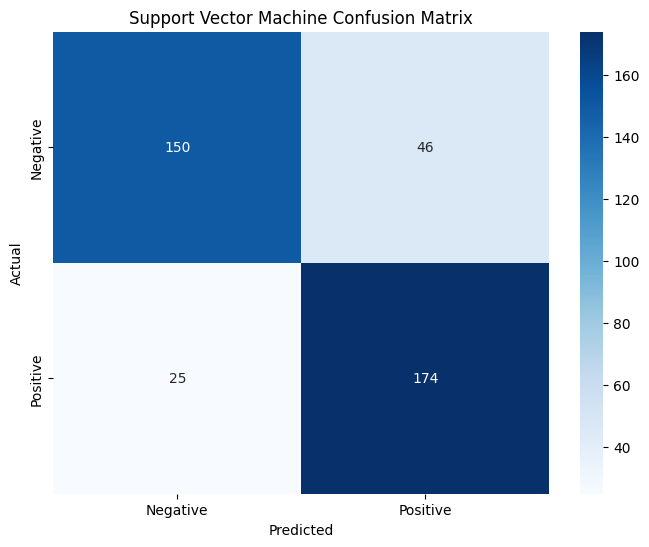

Training Random Forest...

Random Forest Performance:
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.8
Loss: 0.4893346210588657
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.75      0.79       196
        True       0.78      0.85      0.81       199

    accuracy                           0.80       395
   macro avg       0.80      0.80      0.80       395
weighted avg       0.80      0.80      0.80       395

Confusion Matrix:
 [[147  49]
 [ 30 169]]


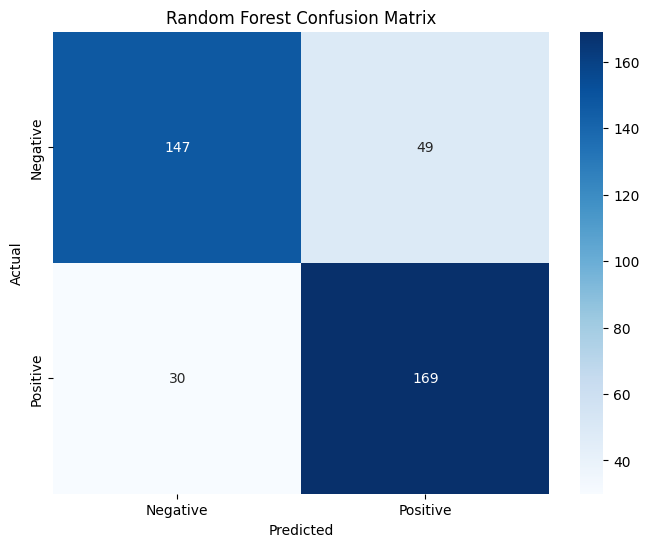

In [14]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # find best model
    best_model = grid_search.best_estimator_
    
    # predict using test set
    y_pred = best_model.predict(X_test)
    probability_predictions = best_model.predict_proba(X_test)[:, 1]
    
    # evaluate the model

    accuracy = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, probability_predictions)
    
    print(f"\n{model_name} Performance:")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Loss:", loss)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

In [15]:
for i in range(10):
    review = df['Review'].iloc[i]
    model = grid_search.best_estimator_
    probability = model.predict_proba(X_vectorized[i])[0, 1]
    goodReview = True if probability >= 0.5 else False
    print(f'Review #{i+1}:\n')
    print(f'{review}\n')
    print(f'Probability of Positive Review: {probability:.2f}')
    print(f'Prediction: Is this a good review? {goodReview}')
    print(f'Actual: Is this a good review? {y.iloc[i]}\n')

Review #1:

This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot


Probability of Positive Review: 0.77
Prediction: Is this a good review? True
Actual: Is this a good review? True

Review #2:

This very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book.  It chronicals the life of a young Scottish woman forced to live first in China then Japan.  Well written and historically accurate, it's obvious the author is intimately familiar with the the culture, custo

### Conclusion:
Above, I have printed out the first 10 book reviews along with the probability of it being a positive review, its prediction, and actual. Analyzing the output, we can see that the sentiment analysis model does a reasonable job at classifying the book reviews provided in the dataset. The overall accuracy of the model is around 80%, which indicates that it has strong performance with classifying the reviews. 